# Joshua Rotuna - CA05




In [1]:
# Importing necessary Packages
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')
df

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4


In [12]:
# Checking for Class Imbalnce
df.cvd_4types.value_counts()

count_no = len(df[df.cvd_4types==0])
count_yes = len(df[df.cvd_4types==1])

print('Percent of No:  ', count_no/(count_no+count_yes))
print('Percent of Yes: ', count_yes/(count_no+count_yes))
  # Does not appear to have a serious problem with class imbalance

Percent of No:   0.4099321406539173
Percent of Yes:  0.5900678593460826


## Data Definitions:
age_s1: Age in years at time of study

race: race of individual, Race is presented as three categories

educat: Education level (Less than 10 years, 11-15, 16-20, 20>)

mstat: Marital status

hip: hip circumfrence

neck20: Neck circumference in centimeters

waist: waist circumfrence

av_weight_kg: weight in kilograms

cgpkyr: Lifetime cigarette pack smoker, in years

tea15: Cups of tea drank on average day

srthype: self reported hypertension

parrptdiab: History of diabetes

bend25: QUality of life

happy25: During pas four weeks, how much they have been happy. Scale of 1-6

tired25: During pas four weeks, how much they have been tired. Scale of 1-6

hlthim25: Social activities limited by health conditions in last four weeks



In [13]:
# Describing the Data:
  # Examining forst few rows
df.head()
  # Checking Data types
df.info()
  #Checkign for Null values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


# Building Binary Classifier Model: Logistic Regression Model

In [4]:
# Creating X and y datasets to split
X = df.iloc[0:,1:]
y = df.iloc[0:,0:1]

# Splitting Test and Training Data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)
X_train 

,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
3169,54,1,2,1,99.0,32.0,89.0,77.1,0.00,0,0,0,3,4,3,4
1933,65,1,2,2,97.0,34.0,94.0,77.8,38.00,0,0,0,3,2,5,4
1695,59,1,3,1,101.0,40.0,103.0,85.8,25.00,0,0,0,3,2,5,4
2105,65,1,4,1,107.0,43.0,102.0,86.5,33.15,0,0,0,3,1,6,4
1540,62,1,3,1,102.0,43.0,101.0,85.2,0.00,0,0,0,3,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,62,1,3,1,138.0,46.8,131.0,102.4,46.00,0,1,0,3,1,5,4
905,78,1,3,1,100.0,34.0,96.0,77.1,0.00,0,1,0,3,3,5,4
1096,81,1,1,1,97.0,32.0,97.0,83.9,0.00,0,1,0,2,1,4,4
235,55,1,2,1,113.0,40.0,97.0,85.4,26.00,0,0,0,3,3,4,4


In [9]:
# Fitting the model
model = LogisticRegression(C=1e40, solver= 'newton-cg', penalty='l2')  
model.fit(X_train, y_train)   

# Making predictions
pred = model.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Determining Feature Importance


In [6]:
# Standardizing coefficients
model.fit(X_train / np.std(X_train, 0),y_train) 
model_coef = print(abs(model.coef_))
coef = pd.DataFrame(model_coef)

# Creating dataframe with the coefficent titles
coefficient_df = pd.DataFrame(columns = ['coefficient'],  
                   index = [X_train.columns]) 

# Taking the absolute value of each coefficient and putting it into an array
coefs = abs(model.coef_)
print(model.classes_)

# Creating DataFrame with X_train columns as column headers
coefs_df = pd.DataFrame(coefs, columns=X_train.columns, index=['coefficient'])
# Transposing data to become vertical
coefs_df = coefs_df.transpose()

# Display coefficients in order of highest to lowest:
coef_sorted = coefs_df.coefficient.sort_values(ascending=False)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0.01151828 0.32822784 0.18162399 0.13161686 0.57132514 0.1442237
  1.08854177 0.27771056 0.04315829 0.04178331 0.09788662 0.14039968
  0.06739737 0.09593306 0.08275208 0.35950979]]
[0 1]


In [7]:
# Listing most important features in order of importance
coef_sorted

waist           1.088542
hip             0.571325
hlthlm25        0.359510
race            0.328228
av_weight_kg    0.277711
educat          0.181624
neck20          0.144224
parrptdiab      0.140400
mstat           0.131617
srhype          0.097887
happy25         0.095933
tired25         0.082752
bend25          0.067397
cgpkyr          0.043158
tea15           0.041783
age_s1          0.011518
Name: coefficient, dtype: float64

## Performance Metrics

Accuracy Score: 0.6960098724804608

confusion matrix:
[[148 170]
 [ 75 418]]

True Negative: 148
True Positive: 418
False Negative: 75
False Negative: 170

F1 Score:  0.7733580018501388



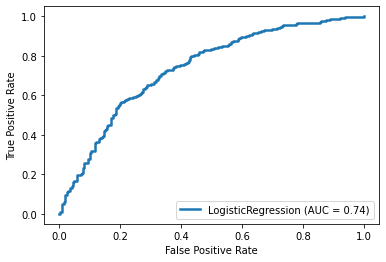

In [10]:
# Performance Metrics:
# Accuracy Score:
accuracy_score = model.score(X_train, y_train)
print('Accuracy Score:', accuracy_score)

# Confusion Matrix:
print()
cm = metrics.confusion_matrix(y_test, pred)
print('confusion matrix:')
print(cm)
print()
print('True Negative:', cm[0,0])
print('True Positive:', cm[1,1])
print('False Negative:', cm[1,0])
print('False Negative:', cm[0,1])
print()

# F1 Score
f1 = f1_score(y_test, pred)
print("F1 Score: ", f1)
print()

# Plotting ROC curve
metrics.plot_roc_curve(model, X_test, y_test, linewidth = 2.5)
plt.show()
